# Assignment 1
| Student Name           | Student Id | Course                                        |
|------------------------|------------|-----------------------------------------------|
| Christo Pananjickal Baby | 8989796    | CSCN8020 - Reinforcement Learning Programming |




## Problem 1

In Reinforcement Learning, the key components are
1. Environment
2. Agent
3. State
4. Action
5. Reward


For this problem lets consider a simple robotic arm which has 2 joints, joints 1 and 2 which can rotate 90 and 45 degrees respectively and a gripper which can open and close as given in below diagram.
![Robot arm](<images/Robot arm.png>)

### Environment

The environment is the workspace of the robot arm, where the robot or the agent is interacting with. It can include the 2 joints with their limits, the gripper, the table, the object to be picked, and the target location where the object must be placed. The physical forces such as gravity, friction etc could also be considered in environment.
* **Reasoning** - The environment defines the world in which the agent operates. Including the robot hardware limits and physical forces ensures realistic learning and prevents the agent from attempting impossible actions.


### Agent
The agent is the robotic arm controller (the RL algorithm) that decides what commands to send to the joints and gripper to perform an action.
* **Reasoning**: The agent represents the decision-maker in reinforcement learning. It learns from rewards and chooses actions that maximize task success over time.

### State(s)
The state describes the current situation. It will include joint 1 angle, joint 2 angle, their velocities, gripper status (opened,closed), position of object on table, target position.
* **Reasoning**: The state must fully describe both the robot’s mechanical condition and the task progress. Without these, the agent cannot make informed decisions about what to do next.

### Action (a)

Action is the step or activity done by the agent. In this case, rotating joint 1 and 2(which can be a small positive or negative torque/step), open or close gripper can be the activity.
* **Reasoning**: Actions represent the agent’s control over the environment. Choosing joint rotations and gripper commands allows the robot to move smoothly and manipulate the object to achieve the pick-and-place task.

### Reward (r)

Reward is the feedback from the environment which tells the agent how good or bad was the action done in a given state.In this example, the reward should encourage fast, smooth, and successful pick-and-place of the object and discourage any unwanted dropping or wrong picking of the object. Rewards can be assigned for different situations, for example,
* 100 points if object is placed at target correctly (maximum points because the agent has successfully completed the task)
* 5 points if object is picked up correctly (few positive points because first step in the procedure was completed successfully)
* -1 point for each second the arm spends. (This is to promote movement speed in the learning process).
* -10 points if object is dropped anywhere other than correct location. (Negative 10 because the agent failed to complete the task. From this -10, the agent will understand what it just did is not good)
* -5 points for unwanted jerky or energy wasting movements. (Due to this -5 points agent will try to avoid any unwanted movements made between the procedure).
* -50 penalty if joint angles exceed the given limits or hitting any other objects. (From this heavy -50 points, the agent will learn never go beyond the given threshold angles or never hit any other objects)


* **Reasoning**: Positive and negative feedbacks helps the system understand what is it trying to achieve.

## Problem 2

Given details in the problem:

* States (S): {s1, s2, s3, s4}
* Actions (A): {up, down, left, right}
* Rewards: R(s1) = 5, R(s2) = 10, R(s3) = 1, R(s4) = 2
* Transitions: deterministic unless hitting a wall (then stays in the same state).
* Discount Factor (γ): not given, so let’s assume γ = 1 (since it is the standard for small use cases).
* Initial Policy π: π(up|s) = 1, Which means always move up for every state, but since we are doing value iteration, and we need policy improvement we will update the policy.

#### Initialize Value Function
At the very beginning, we can set all values to zero:
V<sub>0</sub>(s1) = 0, V<sub>0</sub>(s2) = 0, V<sub>0</sub>(s3) = 0, V<sub>0</sub>(s4) = 0,


#### Value Iteration Update Equation
For each state:
V<sub>k+1</sub>(s) = R(s) + γ $\max_{a}$ Σ<sub>s'</sub> P(s'|s,a) V<sub>k</sub>(s') <br>
Since our initial policy is to move up for every state, P(s'|s,a) = 1 <br>
So, now our equation can be simplified to V<sub>k+1</sub>(s) = R(s) + γ $\max_{a}$ V<sub>k</sub>(s')<br>
Where R(s) is the immediate reward, max V<sub>k</sub>(s') is the best future value


### Iteration 1
From initial values, V<sub>0</sub>(s)=0, <br>

#### * **s1**

Actions:
  * up -> stays in s1 (wall) -> V=0
  * down -> s3 -> V=0
  * left -> stays in s1 -> V=0
  * right -> s2 -> V=0 <br>
Best action value, V = 0 <br>
V<sub>1</sub>(s1) = R(s1) + 0 = 5+0 = 5


#### * **s2**

Actions:
  * up -> stays in s2 (wall) -> V=0
  * down -> s4 -> V=0
  * left -> s1 -> V=0
  * right -> stays in s2 (wall) -> V=0 <br>
Best action value, V = 0 <br>
V<sub>1</sub>(s2) = R(s2) + 0 = 10 + 0 = 10

#### * **s3**

Actions:
  * up -> s1 -> V=0
  * down -> stays in s3 (wall) -> V=0
  * left -> stays in s3 (wall) -> V=0
  * right -> s4 -> V=0 <br>
Best action value, V = 0 <br>
V<sub>1</sub>(s3) = R(s3) + 0 = 1 + 0 = 1

#### * **s4**

Actions:
  * up -> s2 -> V=0
  * down -> stays in s4 (wall) -> V=0
  * left -> s3 -> V=0
  * right -> stays in s4 (wall) -> V=0 <br>
Best action value, V = 0 <br>
V<sub>1</sub>(s4) = R(s4) + 0 = 2 + 0 = 2 <br> <br>


So after completing iteration 1, we have <br>
V<sub>1</sub> = {s1: 5, s2: 10, s3: 1, s4: 2} <br>


### Iteration 2
Now we can use V1 values,

#### * **s1**
Actions:

  * up -> s1 -> V=5
  * down -> s3 -> V=1
  * left -> s1 -> V=5
  * right -> s2 -> V=10<br>
Best action value, V = 10<br>
V2(s1) = R(s1) + V = 5+10 = 15
#### * **s2**
Actions:

  * up -> s2 -> V=10
  * down -> s4 -> V=2
  * left -> s1 -> V=5
  * right -> stays in s2 -> V=10<br>
Best action value, V = 10<br>
V2(s2) = R(s2) + V = 10 + 10 = 20
#### * **s3**
Actions:

  * up -> s1 -> V=5
  * down -> s3 -> V=1
  * left -> s3 -> V=1
  * right -> s4 -> V=2<br>
Best action value, V = 5<br>
V2(s3) = R(s3) + V = 1 + 5 = 6
#### * **s4**
Actions:

  * up -> s2 -> V=10
  * down -> s4 -> V=2
  * left -> s3 -> V=1
  * right -> stays in s4 -> V=2<br>
Best action value, V = 10<br>
V2(s4) = R(s4) + V = 2 + 10 = 12

So after completing iteration 2, we have
V2 = {s1: 15, s2: 20, s3: 6, s4: 12}
<br><br>

### Policy Improvement after Iteration 2

Now we can choose the greedy action (the action that leads to the best next value) for each state:

* s1 -> best action = right (to s2)
* s2 -> best action = up or right (stays in s2, value 10)
* s3 -> best action = up (to s1)
* s4 -> best action = up (to s2)

So the improved policy is:
π = { s1:right, s2:up, s3:up, s4:up }

**We could continue iterating until convergence, but after two iterations we already see the  policy getting better and better.**



## Problem 3

#### Environment Definition
- States (S): Each cell in a 5x5 grid, indexed as (i,j).
- Terminal State: (4,4) (bottom-right corner).
- Grey States: (2,2), (3,0), (0,4) — valid but unfavorable.
- Actions (A): Right, Down, Left, Up.
- Transitions: Deterministic; invalid moves leave the agent in the same state.
- Rewards (R):
  - +10 if at goal state (4,4).
  - -5 if at grey states.
  - -1 otherwise.

#### Task 1: Update MDP Code and Run Standard Value Iteration

I am creating a class `GridworldMDP` which will define the 5x5 Gridworld environment as an MDP. It sets up the states, actions, rewards (goal = +10, grey states = -5, others = -1),
and provides methods to run Value Iteration and extract the optimal policy.

- `step()` -> moves the agent given an action (or stays if invalid).
- `value_iteration()` -> runs standard Value Iteration until convergence.
- `extract_policy()`-> builds the optimal policy (arrows, G for goal, X for grey states).


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
class GridworldMDP:
    def __init__(self, n=5, gamma=0.9, theta=1e-4):
        self.n = n
        self.gamma = gamma
        self.theta = theta
        self.goal_state = (4, 4)
        self.grey_states = {(2, 2), (3, 0), (0, 4)}

        # Reward function
        self.rewards = {}
        for i in range(n):
            for j in range(n):
                if (i, j) == self.goal_state:
                    self.rewards[(i, j)] = 10
                elif (i, j) in self.grey_states:
                    self.rewards[(i, j)] = -5
                else:
                    self.rewards[(i, j)] = -1

        # Actions: right, down, left, up
        self.actions = {
            "→": (0, 1),
            "↓": (1, 0),
            "←": (0, -1),
            "↑": (-1, 0),
        }


 # Transition function: return next state after applying action.
    def step(self, state, action):
        if state == self.goal_state:
            return state
        i, j = state
        di, dj = self.actions[action]
        new_i, new_j = i + di, j + dj
        if 0 <= new_i < self.n and 0 <= new_j < self.n:
            return (new_i, new_j)
        return state

 # Standard (synchronous) Value Iteration.
    def value_iteration(self):
        V = np.zeros((self.n, self.n))
        iterations = 0
        start_time = time.time()
        while True:
            delta = 0
            new_V = np.copy(V)
            for i in range(self.n):
                for j in range(self.n):
                    s = (i, j)
                    if s == self.goal_state:
                        continue
                    # Bellman update
                    new_V[i, j] = self.rewards[s] + self.gamma * max(
                        V[self.step(s, a)] for a in self.actions
                    )
                    delta = max(delta, abs(new_V[i, j] - V[i, j]))
            V = new_V
            iterations += 1
            if delta < self.theta:
                break
        elapsed = time.time() - start_time
        return V, iterations, elapsed

# Extract optimal policy from value function V.
    def extract_policy(self, V):
        policy = [["" for _ in range(self.n)] for _ in range(self.n)]
        for i in range(self.n):
            for j in range(self.n):
                s = (i, j)
                if s == self.goal_state:
                    policy[i][j] = "G"
                    continue
                if s in self.grey_states:
                    policy[i][j] = "X"
                    continue
                best_a = max(self.actions, key=lambda a: V[self.step(s, a)])
                policy[i][j] = best_a
        return policy


#### Task 1 Results

Task 1 Results: Standard Value Iteration
Iterations: 9  Time: 0.0003 seconds

Optimal Value Function V*:
╒═══════╤═══════╤═══════╤═══════╤═══════╕
│ -5.7  │ -5.22 │ -4.69 │ -4.1  │ -7.44 │
├───────┼───────┼───────┼───────┼───────┤
│ -5.22 │ -4.69 │ -4.1  │ -3.44 │ -2.71 │
├───────┼───────┼───────┼───────┼───────┤
│ -4.69 │ -4.1  │ -7.44 │ -2.71 │ -1.9  │
├───────┼───────┼───────┼───────┼───────┤
│ -8.1  │ -3.44 │ -2.71 │ -1.9  │ -1    │
├───────┼───────┼───────┼───────┼───────┤
│ -3.44 │ -2.71 │ -1.9  │ -1    │  0    │
╘═══════╧═══════╧═══════╧═══════╧═══════╛

Optimal Policy π*:
╒═══╤═══╤═══╤═══╤═══╕
│ → │ → │ → │ ↓ │ X │
├───┼───┼───┼───┼───┤
│ → │ → │ → │ → │ ↓ │
├───┼───┼───┼───┼───┤
│ → │ ↓ │ X │ → │ ↓ │
├───┼───┼───┼───┼───┤
│ X │ → │ → │ → │ ↓ │
├───┼───┼───┼───┼───┤
│ → │ → │ → │ → │ G │
╘═══╧═══╧═══╧═══╧═══╛


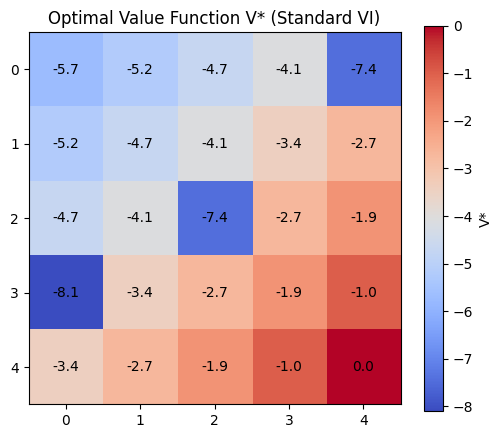

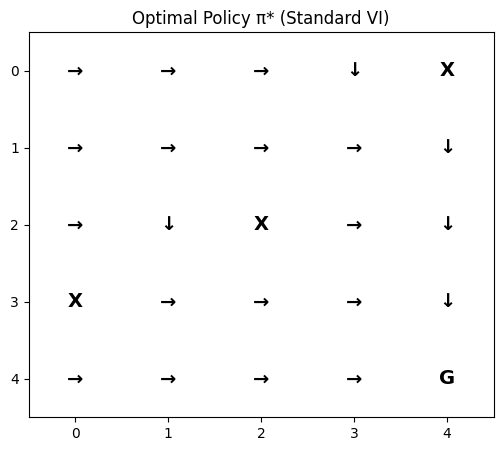

In [3]:
# Initialize environment
mdp = GridworldMDP()

# Run Standard Value Iteration
V_std, it_std, t_std = mdp.value_iteration()
policy_std = mdp.extract_policy(V_std)

# Show results using tabulate
print("Task 1 Results: Standard Value Iteration")
print("Iterations:", it_std, " Time:", round(t_std, 4), "seconds\n")

print("Optimal Value Function V*:")
print(tabulate(np.round(V_std, 2), tablefmt="fancy_grid"))

print("\nOptimal Policy π*:")
print(tabulate(policy_std, tablefmt="fancy_grid"))

# Visualization
plt.figure(figsize=(6,5))
plt.imshow(V_std, cmap="coolwarm", origin="upper")
plt.colorbar(label="V*")
plt.title("Optimal Value Function V* (Standard VI)")
for i in range(mdp.n):
    for j in range(mdp.n):
        plt.text(j, i, round(V_std[i,j],1), ha='center', va='center', color='black')
plt.show()

plt.figure(figsize=(6,5))
for i in range(mdp.n):
    for j in range(mdp.n):
        plt.text(j, i, policy_std[i][j], ha='center', va='center', fontsize=14, weight='bold')
plt.xlim(-0.5, mdp.n-0.5)
plt.ylim(mdp.n-0.5, -0.5)
plt.title("Optimal Policy π* (Standard VI)")
plt.show()


#### Task 2: Value Iteration Variations (In-Place)

Task 2 Results: In-Place Value Iteration
Iterations: 9  Sweeps: 9  Time: 0.0004 seconds

Optimal Value Function V*:
╒═══════╤═══════╤═══════╤═══════╤═══════╕
│ -5.7  │ -5.22 │ -4.69 │ -4.1  │ -7.44 │
├───────┼───────┼───────┼───────┼───────┤
│ -5.22 │ -4.69 │ -4.1  │ -3.44 │ -2.71 │
├───────┼───────┼───────┼───────┼───────┤
│ -4.69 │ -4.1  │ -7.44 │ -2.71 │ -1.9  │
├───────┼───────┼───────┼───────┼───────┤
│ -8.1  │ -3.44 │ -2.71 │ -1.9  │ -1    │
├───────┼───────┼───────┼───────┼───────┤
│ -3.44 │ -2.71 │ -1.9  │ -1    │  0    │
╘═══════╧═══════╧═══════╧═══════╧═══════╛

Optimal Policy π*:
╒═══╤═══╤═══╤═══╤═══╕
│ → │ → │ → │ ↓ │ X │
├───┼───┼───┼───┼───┤
│ → │ → │ → │ → │ ↓ │
├───┼───┼───┼───┼───┤
│ → │ ↓ │ X │ → │ ↓ │
├───┼───┼───┼───┼───┤
│ X │ → │ → │ → │ ↓ │
├───┼───┼───┼───┼───┤
│ → │ → │ → │ → │ G │
╘═══╧═══╧═══╧═══╧═══╛


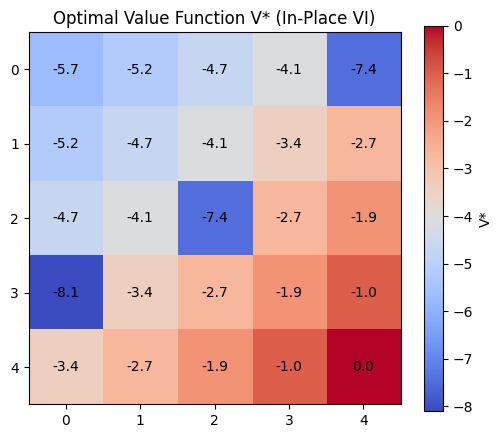

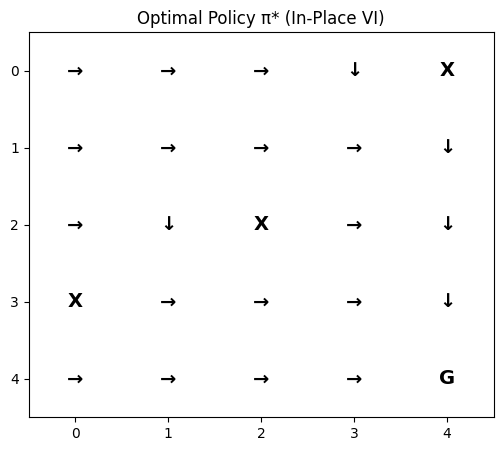

In [4]:
# In-Place Value Iteration: Updates the value of each state immediately so the updated value is used in 
# subsequent updates within the same iteration. We also count sweeps explicitly.

def in_place_value_iteration(mdp):
    V = np.zeros((mdp.n, mdp.n))
    iterations = 0
    sweeps = 0
    start_time = time.time()
    
    while True:
        delta = 0
        sweeps += 1  # one full pass over all states
        for i in range(mdp.n):
            for j in range(mdp.n):
                s = (i, j)
                if s == mdp.goal_state:
                    continue
                old_v = V[i, j]
                # Bellman update using the latest values
                V[i, j] = mdp.rewards[s] + mdp.gamma * max(
                    V[mdp.step(s, a)] for a in mdp.actions
                )
                delta = max(delta, abs(old_v - V[i, j]))
        iterations += 1
        if delta < mdp.theta:
            break
            
    elapsed = time.time() - start_time
    return V, iterations, sweeps, elapsed

# Run In-Place Value Iteration
V_in, it_in, sw_in, t_in = in_place_value_iteration(mdp)
policy_in = mdp.extract_policy(V_in)

print("Task 2 Results: In-Place Value Iteration")
print("Iterations:", it_in, " Sweeps:", sw_in, " Time:", round(t_in, 4), "seconds\n")

print("Optimal Value Function V*:")
print(tabulate(np.round(V_in, 2), tablefmt="fancy_grid"))

print("\nOptimal Policy π*:")
print(tabulate(policy_in, tablefmt="fancy_grid"))

# Visualization
plt.figure(figsize=(6,5))
plt.imshow(V_in, cmap="coolwarm", origin="upper")
plt.colorbar(label="V*")
plt.title("Optimal Value Function V* (In-Place VI)")
for i in range(mdp.n):
    for j in range(mdp.n):
        plt.text(j, i, round(V_in[i,j],1), ha='center', va='center', color='black')
plt.show()

plt.figure(figsize=(6,5))
for i in range(mdp.n):
    for j in range(mdp.n):
        plt.text(j, i, policy_in[i][j], ha='center', va='center', fontsize=14, weight='bold')
plt.xlim(-0.5, mdp.n-0.5)
plt.ylim(mdp.n-0.5, -0.5)
plt.title("Optimal Policy π* (In-Place VI)")
plt.show()


#### Comparison and Discussion


In [6]:
# Generate comparison table including sweeps
comparison = [
    ["Standard VI", it_std, it_std, round(t_std, 4), "O(|S||A|) per iteration"],
    ["In-Place VI", it_in, sw_in, round(t_in, 4), "O(|S||A|), fewer sweeps(in case of larger grids)"],
]

print(tabulate(
    comparison,
    headers=["Method", "Iterations", "Sweeps", "Time (sec)", "Complexity"],
    tablefmt="fancy_grid"
))


╒═════════════╤══════════════╤══════════╤══════════════╤══════════════════════════════════════════════════╕
│ Method      │   Iterations │   Sweeps │   Time (sec) │ Complexity                                       │
╞═════════════╪══════════════╪══════════╪══════════════╪══════════════════════════════════════════════════╡
│ Standard VI │            9 │        9 │       0.0003 │ O(|S||A|) per iteration                          │
├─────────────┼──────────────┼──────────┼──────────────┼──────────────────────────────────────────────────┤
│ In-Place VI │            9 │        9 │       0.0004 │ O(|S||A|), fewer sweeps(in case of larger grids) │
╘═════════════╧══════════════╧══════════╧══════════════╧══════════════════════════════════════════════════╛


#### Comments on Computational Complexity

- Both methods have the same per-iteration complexity: O(|S||A|), where |S| is the number of states and |A| is the number of actions.
- **Standard Value Iteration** uses synchronous updates (easier to parallelize).
- **In-Place Value Iteration** updates values immediately, often requiring fewer iterations and thus less computation time.
- Both converge to the same $V^*$ and $π^*$, as confirmed in the results.

